In [1]:
#data preprocessing and importing required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv(r"D:\CDC\Project\Churn_Modelling.csv")
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [12]:
#feature selection from above features
x=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [13]:
print(x,y)

      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
0           

In [14]:
#categorical variables==>Nominal
geography=pd.get_dummies(x["Geography"],drop_first=True)
gender=pd.get_dummies(x["Gender"],drop_first=True)

In [15]:
print(geography,gender)

      Germany  Spain
0       False  False
1       False   True
2       False  False
3       False  False
4       False   True
...       ...    ...
9995    False  False
9996    False  False
9997    False  False
9998     True  False
9999    False  False

[10000 rows x 2 columns]        Male
0     False
1     False
2     False
3     False
4     False
...     ...
9995   True
9996   True
9997  False
9998   True
9999  False

[10000 rows x 1 columns]


In [16]:
x=pd.concat([x,geography,gender],axis=1)

In [17]:
x=x.drop(['Geography','Gender'],axis=1)

In [18]:
print(x.columns)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Germany', 'Spain', 'Male'],
      dtype='object')


In [20]:
print(x)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Germany  Spain   Male  
0                  1        101348.88    False  False  False  
1                  1 

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [38]:
print(X_train)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
7389          667   34       5       0.00              2          1   
9275          427   42       1   75681.52              1          1   
2995          535   29       2  112367.34              1          1   
5316          654   40       5  105683.63              1          1   
356           850   57       8  126776.30              2          1   
...           ...  ...     ...        ...            ...        ...   
9225          594   32       4  120074.97              2          1   
4859          794   22       4  114440.24              1          1   
3264          738   35       5  161274.05              2          1   
9845          590   38       9       0.00              2          1   
2732          623   48       1  108076.33              1          1   

      IsActiveMember  EstimatedSalary  Germany  Spain   Male  
7389               0        163830.64    False   True  False  
9275               1 

In [23]:
print((len(X_train),len(X_test)))

(8000, 2000)


In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(X_train)
x_test=sc.fit_transform(X_test)

In [25]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [26]:
#building ANN and importing required packages an libraries
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [27]:
Classifier = Sequential()

In [30]:
Classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))

In [33]:
Classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))

In [34]:
Classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [35]:
Classifier.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [39]:
model=Classifier.fit(x_train,Y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7940 - loss: 0.5037 - val_accuracy: 0.7955 - val_loss: 0.4793
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8032 - loss: 0.4582 - val_accuracy: 0.7955 - val_loss: 0.4475
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8038 - loss: 0.4149 - val_accuracy: 0.7955 - val_loss: 0.4307
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8051 - loss: 0.4115 - val_accuracy: 0.8012 - val_loss: 0.4227
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8087 - loss: 0.4000 - val_accuracy: 0.7993 - val_loss: 0.4160
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8048 - loss: 0.3917 - val_accuracy: 0.8129 - val_loss: 0.4098
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8171 - loss: 0.3866 - val_accuracy: 0.8175 - val_loss: 0.4045
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8221 - loss: 0.3916 - val_accu

In [40]:
y_pred_by_my_model=Classifier.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [41]:
print(y_pred_by_my_model)

[[0.27456075]
 [0.19906868]
 [0.09242287]
 ...
 [0.09951141]
 [0.11877685]
 [0.13658966]]


In [42]:
y_pred_by_my_model=(y_pred_by_my_model>0.5)
y_pred_by_my_model

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [46]:
#confusion matrix to know about my predicitons
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
Y_test

9394    0
898     1
2398    0
5906    0
2343    0
       ..
1037    0
2899    0
9549    0
2740    0
6690    0
Name: Exited, Length: 2000, dtype: int64

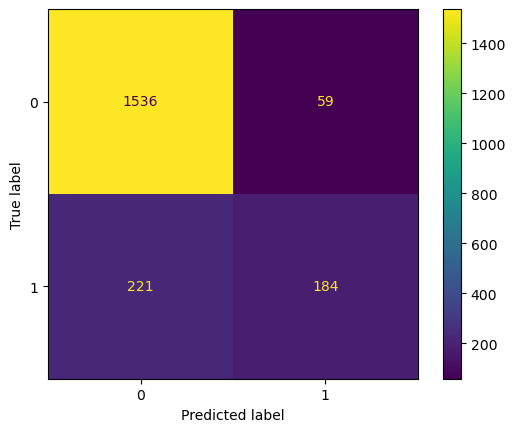

In [47]:
cm = confusion_matrix(Y_test, y_pred_by_my_model)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [48]:
from sklearn.metrics import accuracy_score
score=accuracy_score(Y_test,y_pred_by_my_model)
score

0.86